In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('happy.csv')

In [3]:
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [7]:
data.shape

(111, 11)

In [10]:
happy = data['happyScore']
income = data['avg_income']

In [14]:
happy.max()

7.5870000000000015

In [15]:
income.min()

572.88

In [18]:
import matplotlib.pyplot as plt


Text(0.5,0,'income')

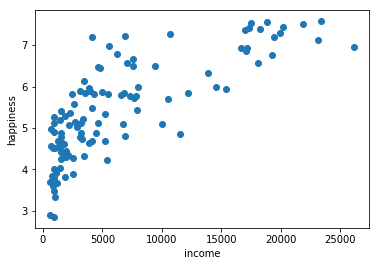

In [22]:
plt.scatter(income,happy)
plt.ylabel('happiness')
plt.xlabel('income')

In [33]:
a = (data.where(data['happyScore']>5)
     .dropna()
     .groupby(level=0)['avg_income']
     .agg({'avgincome':np.mean})).head()
a

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,avgincome
2,7101.120
3,19457.040
4,19917.000
5,3381.600
7,17168.505


In [28]:
data.sort_values('avg_income', inplace = True) #the whole data is affected

In [29]:
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.88,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.20,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.04,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.72,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.40,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger


In [30]:
 richest  = data[data['avg_income']>50]

In [34]:
richest.iloc[0]

country                               Burundi
adjusted_satisfaction                      25
avg_satisfaction                          2.9
std_satisfaction                         1.96
avg_income                             572.88
median_income                          436.92
income_inequality                       33.36
region                   'Sub-Saharan Africa'
happyScore                              2.905
GDP                                    0.0153
country.1                             Burundi
Name: 10, dtype: object

In [35]:
richest.iloc[-1]

country                        Luxembourg
adjusted_satisfaction                  66
avg_satisfaction                      7.7
std_satisfaction                     1.76
avg_income                        26182.3
median_income                     22240.2
income_inequality                   31.95
region                   'Western Europe'
happyScore                          6.946
GDP                               1.56391
country.1                      Luxembourg
Name: 61, dtype: object

Text(572.88,2.905,'Burundi')

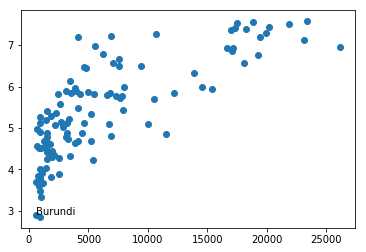

In [55]:
for i in data.columns:
    if  i[:1] == 'avg_income':
        data.rename(columns={'i':'sth'}, inplace =True)
        
rich = data[data['avg_income']>100]
plt.scatter(rich['avg_income'], rich['happyScore'])
plt.text(rich.iloc[0]['avg_income'], rich.iloc[0]['happyScore'], rich.iloc[0]['country'])

In [42]:
richest_mean = np.mean(data['avg_income'])

In [43]:
richest_mean

6442.75141621464

Text(26182.3,6.946,'Luxembourg')

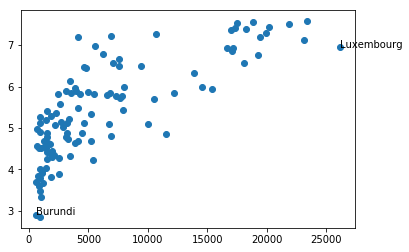

In [50]:
plt.scatter(richest['avg_income'],richest['happyScore'])
plt.text(richest.iloc[0]['avg_income'],richest.iloc[0]['happyScore'],richest.iloc[0]['country'])
plt.text(richest.iloc[-1]['avg_income'],richest.iloc[-1]['happyScore'],richest.iloc[-1]['country'])
#plt.text(x,y,what you want to show)

In [60]:
for i,j in rich.iterrows():
    print(j['country'])

Burundi
Madagascar
Liberia
Mozambique
Niger
Sierra Leone
Burkina Faso
Mali
Lesotho
Nigeria
Togo
Tanzania
Rwanda
Zambia
Benin
Ethiopia
Uganda
Senegal
Chad
Bangladesh
India
Nepal
Angola
Pakistan
Cameroon
Laos
Kenya
Tajikistan
Indonesia
Ghana
Zimbabwe
Kyrgyzstan
Cambodia
Djibouti
Mauritania
Georgia
Armenia
Philippines
Vietnam
Nicaragua
Gabon
Sri Lanka
Kosovo
China
Morocco
Moldova
Honduras
Romania
Mongolia
Tunisia
Azerbaijan
El Salvador
Botswana
Kazakhstan
Ecuador
South Africa
Bolivia
Mauritius
Ukraine
Mexico
Peru
Dominican Republic
Colombia
Serbia
Thailand
Paraguay
Iran
Turkey
Bulgaria
Belarus
Brazil
Panama
Poland
Latvia
Lithuania
Costa Rica
Hungary
Argentina
Malaysia
Uruguay
Chile
Russia
Croatia
Estonia
Slovakia
Czech Republic
Portugal
Cyprus
Israel
Greece
Slovenia
Spain
Japan
Italy
Ireland
Sweden
United Kingdom
Belgium
Finland
Denmark
France
Netherlands
Iceland
Germany
Austria
Australia
Canada
Norway
United States
Switzerland
Luxembourg


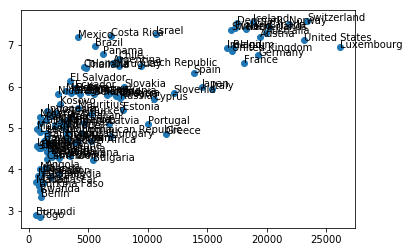

In [63]:
plt.scatter(richest['avg_income'],richest['happyScore']) #shows for allfor i,j in richest.iterrows():
    plt.text(j['avg_income'], j['happyScore'],j['country'])

In [64]:
from sklearn.cluster import KMeans 

In [69]:
income_happy= np.column_stack((income, happy))

kmean = KMeans(n_clusters=3).fit(income_happy)

In [74]:
centers = kmean.cluster_centers_

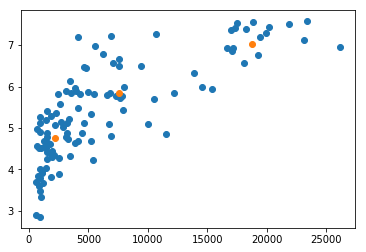

In [75]:
plt.scatter(income, happy)
plt.scatter(centers[:,0],centers[:,1])

In [79]:
from sklearn.cluster import KMeans
happy_income = np.column_stack((income, happy))

In [80]:
km = KMeans(n_clusters = 3).fit(happy_income)

In [81]:
s = km.cluster_centers_

array([[7.57755711e+03, 5.85080769e+00],
       [1.87593022e+04, 7.03270000e+00],
       [2.19912121e+03, 4.75472308e+00]])